# $\mathcal{l}_2$ penalty method algorithm

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time
from copy import deepcopy

#### Testing functions

In [2]:
# def alpha(k): return 2**k
# def xplus(x): return max(x,0)
# def Norm(x): return np.linalg.norm(x)

# def obj_func(x): return x[0]**2 + x[1]**2 + x[0] - x[1]
# def G(x): return np.array([1 -x[0], -x[1] ])
# def P(x,k): return obj_func(x) + (alpha(k)/2)*xplus(G(x)[0])**2 + (alpha(k)/2)*xplus(G(x)[1])**2
# def P_grad(x,k):
#     g1 = 2*x[0] + 1 - alpha(k)*xplus(1-x[0])
#     g2 = 2*x[1] - 1 - alpha(k)*xplus(-x[1])
#     return np.array( [ g1 , g2 ] )
# def stepsize(x1, x0,k): # Barzilai-Borwein step-size (quasi-newton origin)
#     nom = np.dot(x1 - x0, P_grad(x1,k) - P_grad(x0,k))
#     denom = np.linalg.norm( P_grad(x1,k) - P_grad(x0,k) )**2
#     return nom/denom
# # Note: Direction is just steepest descent
# def GD(x, lam ,k):
#     return x - lam*P_grad(x,k)
# def Descent(x, init_step, EPSILON):
#     x0 = np.array(x)
#     k = 1
#     x_list = [x0]
#     lam = init_step
#     x1 = GD(x0, lam ,k)
#     x_list.append(x1)
#     N = Norm(x1 - x0)
#     Norm_list = [N]
    
#     while N > EPSILON:
#         lam = stepsize(x1, x0, k)
#         x0 = x1
#         x1 = GD(x0, lam, k)
#         x_list.append(x1)
#         N = Norm(x1 - x0)
#         Norm_list = [N]
#         k += 1
    
#     return np.array([ x_list, Norm_list ])

## The real deal

In [3]:
def alpha(k): return 2**k
def xplus(x): return max(x,0)
def Norm(x): return np.linalg.norm(x)

In [4]:
FIELDSIZE = 100
SCALE = 100

In [5]:
# calculate a squared norm of s - x, as in our obj func and constraints
def norm_func(s, x):
    return (s[0] - x[0])**2 + (s[1] - x[1])**2

# create a list of the squared euclidean distance from s to each point x in X
def X_norms_sqrd(s, X): return [norm_func(s,i) for i in X]

# find the largest distance
def beta(s, X): return max(X_norms_sqrd(s, X))

# create an objective function
def obj_func(s,X, b): 
    x_list = X_norms_sqrd(s,X)
    return sum(x_list) + beta(s, x_list)

# create the g constraints
def G(s,X, b): return [ norm_func(s, X[i]) - b for i in range(len(X))]

# l2-penalty function
def P(s,X,k, b): 
    return obj_func(s,X, b) + (alpha(k)/2)*sum([ xplus(G(s,X, b)[i])**2 for i in range(len(X)) ])

def P_grad(s,X,k, b):
    s_minus_x_0 = np.array([ s[0] - X[i][0] for i in range(len(X)) ])
    G_sum_0 = np.array([ (s[0] - X[i][0])**2 - b for i in range(len(X))])
    mult_terms_0 = [xplus(s_minus_x_0[i] * G_sum_0[i]) for i in range(len(X))]
    
    g1 = 2*sum(s_minus_x_0) + 2*alpha(k)*sum( mult_terms_0)
    
    s_minus_x_1 = np.array([ s[1] - X[i][1] for i in range(len(X)) ])
    G_sum_1 = np.array([ (s[1] - X[i][1])**2 - b for i in range(len(X))])
    mult_terms_1 = [xplus(s_minus_x_1[i] * G_sum_1[i]) for i in range(len(X))]
    
    g2 = 2*sum(s_minus_x_1) + 2*alpha(k)*sum( mult_terms_1)
    
    return np.array( [g1 , g2])

In [7]:
def stepsize(s1, s0, X, k, b): # Barzilai-Borwein step-size (quasi-newton origin)
    nom = np.dot(s1 - s0, P_grad(s1, X ,k, b) - P_grad(s0, X ,k, b))
    denom = np.linalg.norm( P_grad(s1, X ,k, b) - P_grad(s0, X ,k, b) )**2
    return nom/denom
# Note: Direction is just steepest descent
def GD(s, X, lam ,k, b):
    return s - lam*P_grad(s, X ,k, b)

In [6]:
# generate FIELDSIZE random pts in R^2 \in (0,SCALE)
X_points = [ [ random.random()*SCALE, random.random()*SCALE ] for i in range(FIELDSIZE) ] 

# generate an inital point S in the plain of X
S_0 = [ random.random()*SCALE, random.random()*SCALE ]

In [8]:
def Descent(s, X, init_step, EPSILON):
    b = beta(s, X)
    s0 = np.array(s)
    k = 1
    s_list = [s0]
    lam = init_step
    s1 = GD(s0, X, lam ,k, b)
    s_list.append(s1)
    N = Norm(s1 - s0)
    Norm_list = [N]

    while N > EPSILON:
        b = beta(s, X)
        lam = stepsize(s1, s0, X, k, b)
        s0 = s1
        s1 = GD(s0, X, lam, k, b)
        s_list.append(s1)
        N = Norm(s1 - s0)
        Norm_list.append(N)
        k += 1
    
    return np.array([ s_list, Norm_list ])

In [9]:
TEST = Descent( np.array([5,5]), X_points, 0.1, 1e-10)

<ipython-input-8-d447413cee51>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([ s_list, Norm_list ])


In [10]:
print(TEST[0][-1])

[-14431.15577977 -15037.19128954]


In [11]:
print(TEST[1])

[29131319.599834677, 27744116.78556115, 1387266.339500669, 825877.2735114882, 138970.62535451006, 686906.648156976, 659176.68190289, 13042.014208790879, 646134.6676941083, 642954.4048315064, 1578.4203559852206, 641375.9844755715, 640982.5895626125, 196.5165421864754, 640786.0730200945, 640736.9627114272, 24.552331554490344, 640712.4103730893, 640706.2725852696, 3.068849811778863, 640703.2037124294, 640702.4365050218, 0.38360301453992096, 640702.0525706881, 640701.9566707376, 0.04794992337829424, 640701.9051178097, 640701.8931217474, 0.005993186797801723, 640701.8554891133, 640701.8532459622, 0.0007485420795787012, 640701.8240337617, 640701.8232423923, 9.349972430732443e-05, 640703.2167873153, 640702.2464021764, 1.2111174022782275e-05, 640695.2583022567, 640669.3796127995, 1.2711830591059033e-06, 640716.5906528016, 639724.5849707633, 9.042237511448706e-07, 639867.6972125707, 608020.0841038404, 4.8112953989037895e-09, 585455.6131249075, 22389.061023333867, 20912.260233741847, 2.572439484

In [33]:
TEST[0]

[array([5, 5]),
 array([-18813303.61418309, -18279936.12358874]),
 array([-540913.76555511,  525588.76432316]),
 array([-540479.3486193 ,  525588.76432316]),
 array([-4.46068764e+01,  5.25588764e+05]),
 array([4.67993157e+01, 5.25588764e+05]),
 array([6.06333557e+01, 5.25588764e+05]),
 array([7.77938815e+01, 5.25588764e+05]),
 array([8.55249123e+01, 5.25588764e+05]),
 array([8.98806055e+01, 5.25588764e+05]),
 array([9.28265094e+01, 5.25588764e+05]),
 array([9.48511874e+01, 5.25588764e+05]),
 array([9.59237685e+01, 5.25588764e+05]),
 array([9.75514655e+01, 5.25588764e+05]),
 array([9.84785897e+01, 5.25588764e+05]),
 array([9.84785897e+01, 5.25588764e+05]),
 array([    45.01809684, -18225.04983659]),
 array([ 66029.40905911, 517467.6678743 ]),
 array([ 66029.40906681, 517467.66793468]),
 array([47.21680164, 50.25000892]),
 array([291686.16227376, 292240.01717069]),
 array([291688.45787011, 292242.31712443]),
 array([46.81436524, 47.09422211]),
 array([284354.04520799, 299213.5718173 ]),


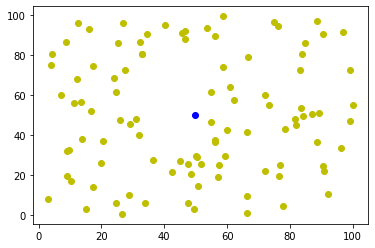

In [12]:
x_ax = [X_points[i][0] for i in range(len(X_points))]
y_ax = [X_points[i][1] for i in range(len(X_points))]
plt.scatter(x_ax, y_ax, c ='y')
plt.scatter(TEST[0][-3][0],TEST[0][-3][1], c = 'b' )
plt.show()

In [44]:
TEST[0][-1]

array([289.60201268, 302.57110591])

In [31]:
P_grad(TEST[0][-1], X_points, 1)

array([48557.52865815, 51095.37592916])

In [35]:
TEST[0][0][0]

5

In [12]:
x0 = np.array([5,5])
EPSILON = 1e-10
k = 1
# x0 = np.array([random.randrange(1,20), random.randrange(0,20)])
print("x:", x0)
print("Gradient", P_grad(x0,k))
lam = 0.1 #random.random() + 1e-12
print('stepsize:',lam)
x1 = GD(x0, lam,k)
print("x:", x1)
print("Gradient", P_grad(x1,k))
N = Norm(x1 - x0)
print("Squared Norm:",N)
while N > EPSILON:
    lam = stepsize(x1,x0, k)
    print("stepsize:", lam)
    x0 = x1
    x1 = GD(x0, lam, k)
    print("x:", x1)
    print("Gradient", P_grad(x1,k))
    k += 1
    print("k=", k)
    N = Norm(x1 - x0)
    print("Squared Norm:",N)

x: [5 5]
Gradient [11  9]
stepsize: 0.1
x: [3.9 4.1]
Gradient [8.8 7.2]
Squared Norm: 1.42126704035519
stepsize: 0.5000000000000002
x: [-0.5  0.5]
Gradient [-3.00000000e+00 -3.55271368e-15]
k= 2
Squared Norm: 5.6850681614207605
stepsize: 0.33608978145304175
x: [1.51653869 0.5       ]
Gradient [ 4.03307738e+00 -1.11022302e-15]
k= 3
Squared Norm: 2.016538688718255
stepsize: 0.1257736516357206
x: [1.00928382 0.5       ]
Gradient [ 3.01856764e+00 -7.77156117e-16]
k= 4
Squared Norm: 0.5072548690896048
stepsize: 0.5
x: [-0.5  0.5]
Gradient [-24.   0.]
k= 5
Squared Norm: 1.509283819628648
stepsize: 0.02958303005095145
x: [0.91998544 0.5       ]
Gradient [0.27950504 0.        ]
k= 6
Squared Norm: 1.4199854424456697
stepsize: 0.015151515151515152
x: [0.95454545 0.5       ]
Gradient [2.66453526e-15 0.00000000e+00]
k= 7
Squared Norm: 0.034560012099784876
stepsize: 0.007692307692307694
x: [0.97692308 0.5       ]
Gradient [-3.55271368e-15  0.00000000e+00]
k= 8
Squared Norm: 0.022377622377622308
ste

In [65]:
Norm([5.12295895e-09, 1.79508469e-01])**2

0.03222329044272399

# OLD CODE

## Failed $\log$ barrier penalty method algorithm

In [ ]:
def obj_func(x): return x[0]**2 + x[1]**2 + x[0] - x[1]
def Gs(x):
    g1, g2 = 1 - x[0] , -x[1]
    return np.array([g1,g2])
def P(x,k):
    return obj_func(x) - (1/k)*np.log(-Gs(x))
def P_grad(x,k):
    p1 = 2*x[0] + 1 + 1/(k*(1-x[0]))
    p2 = 2*x[1] -1 + 1/(k*x[1])
    return np.array([p1,p2])

In [ ]:
# testing
def obj_func(x): return x[0]**2 + x[1]**2 + x[0] - x[1]

In [ ]:
def Gs(x):
    g1, g2 = 1 - x[0] , -x[1]
    return np.array([g1,g2])

In [ ]:
pre_lim_x_test = np.array([2,1.5])
print(obj_func(pre_lim_x_test))
Gs(pre_lim_x_test)

In [ ]:
def P(x,k):
    return obj_func(x) - (1/k)*np.log(-Gs(x))

In [ ]:
(1/k)*np.log(Gs(x1))

In [ ]:
def P_grad(x,k):
    p1 = 2*x[0] + 1 + 1/(k*(1-x[0]))
    p2 = 2*x[1] -1 + 1/(k*x[1])
    return np.array([p1,p2])

In [ ]:
P_grad(pre_lim_x_test,1)

In [ ]:
def Norm(x): return np.linalg.norm(x)

def stepsize(x1, x0,k):
    nom = np.dot(x1 - x0, P_grad(x1,k) - P_grad(x0,k))
    denom = np.linalg.norm( P_grad(x1,k) - P_grad(x0,k) )**2
    return nom/denom

def GD(x, lam ,k):
    return x - lam*P_grad(x,k)

In [ ]:
x = pre_lim_x_test
EPSILON = 1e-3
k = 1
# x0 = np.array([random.randrange(1,20), random.randrange(0,20)])
x0 = x
print("x:", x0)
print("Gradient", P_grad(x0,k))
lam = random.random() + 1e-12


In [ ]:
(1/k)*np.log(Gs(x0))

In [ ]:
Gs(x0)

In [ ]:
x1 = GD(x0, lam,k)
print("x:", x1)
print("Gradient", P_grad(x1,k))
N = Norm(P_grad(x,k))
print("Squared Norm:",N)

In [ ]:
Norm(P_grad([1.0000000001,0.0000000001],k))

In [ ]:
while N > EPSILON:
    lam = stepsize(x1,x0, k)
    print("stepsize:", lam)
    x0 = x1
    x1 = GD(x0, lam, k)
    print("x:", x1)
    print("Gradient", P_grad(x1,k))
    k += 1
    N = Norm(P_grad(x,k))
    print("Squared Norm:",N)
            
           

In [ ]:
k

In [ ]:
FIELDSIZE = 100
NUM_X = 100

X = []

for i in range(FIELDSIZE):
    x_i = np.array([random.randrange(-FIELDSIZE, FIELDSIZE), random.randrange(-FIELDSIZE, FIELDSIZE)])
    X.append(x_i)

In [26]:
random.random()*100

87.18373729622067

Useful code

In [ ]:
S = np.array([random.randrange(-FIELDSIZE, FIELDSIZE), random.randrange(-FIELDSIZE, FIELDSIZE)])
S_data = [S]

def norm_func(s, x):
    return (s[0] - x[0])**2 + (s[1] - x[1])**2

norms = []
for x in X:
    norms.append(norm(S,x))

alpha_index = np.argmax(norms)
alpha = norms[alpha_index]

In [ ]:
lambdas = [0]*len(X)

def obj(s):
    obj_norms = []
    for x in X:
        obj_norms.append(norm(S,x))
    return sum(obj_norms) + alpha

In [ ]:
def conditions(s):
    g = [0]*len(X)
    for i in range(len(X)):
        g[i] = norm(s, X[i]) - alpha
    return g

Useful code

In [ ]:
def lagrange(s):
    G = conditions(s)
    lambda_gs = [0]*len(X)
    for i in range(len(X)):
        lambda_gs[i] = lambdas[i]*G[i]
    return obj(s) + sum(lambda_gs)

In [ ]:
lagrange(S)

In [ ]:
obj(S)

In [ ]:
def grad_lagrange(s):
    gradL = [0, 0]
    for i in range(len(X)):
        gradL[0] += 2*(1+lambdas[i])*(s[0]-X[i][0])
        gradL[1] += 2*(1+lambdas[i])*(s[1]-X[i][1])
    return np.array(gradL)

In [ ]:
G = conditions(S)
G[alpha_index]

In [ ]:
def grad_gl(s):
    gradgL = [0,0]
    for i in range(len(X)):
        gradgL[0] += 2*(s[0] - X[i][0])
        gradgL[1] += 2*(s[1] - X[i][1])
    return np.array(gradgL)

In [ ]:
def Real_norm(s): return np.linalg.norm(s)

In [ ]:
def step(lambdaa):
    return lambdaa - STEPSIZE*grad_gl(S)

In [ ]:
def Backtrack(l1, l2):
    STEPSIZE = np.dot(l2 - l1, 2*(S - ))

In [ ]:
teste = []
L1 = random.randrange(1e6)
L2 = L1 - 5
while Real_norm(grad_lagrange(S)) > 10:
    STEPSIZE = Backtrack(L1, L2)
    lambdas[alpha_index]  = step(lambdas[alpha_index])
    teste.append(lambdas[alpha_index])

In [ ]:
plt.plot(range(len(teste)), teste)
plt.show

In [ ]:
teste[-1]

In [ ]:
teste[0]

In [ ]:
Real_norm(S - np.array(grad_lagrange(S)))

In [ ]:
grad_lagrange(S)

In [ ]:
grad_lagrange(S - 10 * np.array(grad_lagrange(S)))

In [ ]:
STEPSIZE

In [ ]:
random.randrange(1e6)